<a href="https://colab.research.google.com/github/jhryals/ml-labs-lockheed/blob/main/lab02_fuel_efficiency_multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 02: Fuel Efficiency Prediction Using Multiple Linear Regression

**Goal:** Predict aircraft fuel efficiency using multiple features such as altitude, speed, payload, and flight duration.  
**Lockheed Relevance:** Sustainment and mission planning rely on accurate predictions of fuel usage.  
**Key Concepts:** Vectorized multiple linear regression, feature scaling, polynomial features


## 🔧 Step 1: Setup

Import libraries for numerical computation and visualization.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # for feature scaling


## 📊 Step 2: Generate Synthetic Data

We simulate realistic flight data for a small fleet of surveillance aircraft.  
Each observation includes:

- `altitude` (in thousands of feet)  
- `airspeed` (in knots)  
- `payload_weight` (in tons)  
- `flight_duration` (in hours)

Our target is `fuel_consumption` in gallons/hour. We introduce realistic variation and noise.


In [2]:
np.random.seed(1)

m = 100  # number of data points

# Generate features
altitude = np.random.normal(25, 5, m)          # 25k ft avg
airspeed = np.random.normal(400, 50, m)        # 400 knots avg
payload = np.random.normal(5, 2, m)            # 5 tons avg
duration = np.random.normal(3, 0.5, m)         # 3 hrs avg

# Stack features into a matrix X
X_raw = np.column_stack((altitude, airspeed, payload, duration))

# Define true coefficients for simulation
true_weights = np.array([2.0, 0.05, 4.0, 10.0])
bias = 50

# Calculate target variable: fuel usage
noise = np.random.normal(0, 10, m)
y = X_raw @ true_weights + bias + noise  # gallons per hour


## 🧮 Step 3: Feature Scaling

To help gradient descent converge faster, we scale each feature to have:
- Mean = 0
- Standard deviation = 1

This ensures that all features contribute equally to the cost function.


In [3]:
# Standardize features using z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Check shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (100, 4), y shape: (100,)


## 🧠 Step 4: Define the Cost Function (Vectorized)

We use **Mean Squared Error (MSE)** as the cost function:

\[
J(w, b) = \frac{1}{2m} \sum (Xw + b - y)^2
\]\

Vectorized implementation is used for performance.


In [4]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = X @ w + b
    cost = np.sum((f_wb - y)**2) / (2 * m)
    return cost


## 🎯 Step 5: Compute Gradients (Vectorized)

We compute the gradients with respect to the weights and bias:

- \(\frac{\partial J}{\partial w} = \frac{1}{m} X^T (Xw + b - y)\)  
- \(\frac{\partial J}{\partial b} = \frac{1}{m} \sum (Xw + b - y)\)


In [5]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    f_wb = X @ w + b
    error = f_wb - y
    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db


## 🔁 Step 6: Train the Model Using Gradient Descent

We initialize weights and bias to zero, then iteratively update them using gradients.


In [6]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"Iter {i:4d}: Cost={cost:.4f}")

    return w, b, cost_history


In [8]:
# Initialize
w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 0.01
iterations = 10000

# Train model
w_final, b_final, cost_history = gradient_descent(X, y, w_init, b_init, alpha, iterations)


Iter    0: Cost=14550.1817
Iter  100: Cost=1992.4509
Iter  200: Cost=309.7038
Iter  300: Cost=84.0024
Iter  400: Cost=53.6951
Iter  500: Cost=49.6189
Iter  600: Cost=49.0694
Iter  700: Cost=48.9950
Iter  800: Cost=48.9849
Iter  900: Cost=48.9835
Iter 1000: Cost=48.9833
Iter 1100: Cost=48.9832
Iter 1200: Cost=48.9832
Iter 1300: Cost=48.9832
Iter 1400: Cost=48.9832
Iter 1500: Cost=48.9832
Iter 1600: Cost=48.9832
Iter 1700: Cost=48.9832
Iter 1800: Cost=48.9832
Iter 1900: Cost=48.9832
Iter 2000: Cost=48.9832
Iter 2100: Cost=48.9832
Iter 2200: Cost=48.9832
Iter 2300: Cost=48.9832
Iter 2400: Cost=48.9832
Iter 2500: Cost=48.9832
Iter 2600: Cost=48.9832
Iter 2700: Cost=48.9832
Iter 2800: Cost=48.9832
Iter 2900: Cost=48.9832
Iter 3000: Cost=48.9832
Iter 3100: Cost=48.9832
Iter 3200: Cost=48.9832
Iter 3300: Cost=48.9832
Iter 3400: Cost=48.9832
Iter 3500: Cost=48.9832
Iter 3600: Cost=48.9832
Iter 3700: Cost=48.9832
Iter 3800: Cost=48.9832
Iter 3900: Cost=48.9832
Iter 4000: Cost=48.9832
Iter 4100:

## 📈 Step 7: Plot Cost vs Iterations

This shows whether our model is learning and converging properly.


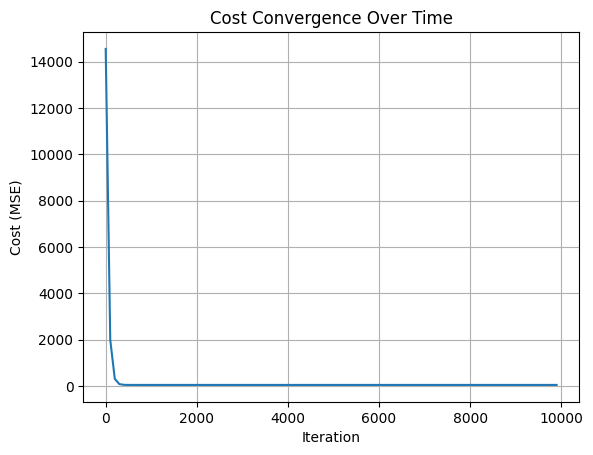

In [9]:
plt.plot(np.arange(0, len(cost_history)) * 100, cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence Over Time")
plt.grid(True)
plt.show()


## 🔍 Step 8: Predict New Aircraft's Fuel Usage

Now that we have trained our model, we can make a prediction for a new surveillance aircraft mission profile.


In [10]:
# New data point (altitude, airspeed, payload, duration)
x_new = np.array([[30, 450, 6, 3.5]])
x_new_scaled = scaler.transform(x_new)

# Predict using trained model
y_pred = x_new_scaled @ w_final + b_final
print(f"Predicted fuel consumption: {y_pred[0]:.2f} gallons/hour")


Predicted fuel consumption: 188.02 gallons/hour
